**EDA (Exploratory Data Analysis):-**


“Compiled” = Collected + Combined + Processed into one dataset. this datse set compiled from the five widely used defect datasets: JM1, KC1, CM1, KC2, and PC1, originally collected from NASA’s Metrics Data Program (MDP).

1. LOADING THE DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("SoftwareDefectDataset.csv")
df.head()


,LOC,CYCLO,LENGTH,VOLUME,DIFFICULTY,INT_FAN_IN,INT_FAN_OUT,NUM_OPERATORS,NUM_OPERANDS,BRANCH_COUNT,DEFECT_LABEL
0,0.779239,0.478261,0.274048,0.544918,0.564121,0.222222,0.444444,0.736196,0.807377,0.642857,0
1,0.595156,0.608696,0.742561,0.758597,0.450649,0.222222,0.000000,0.576687,0.200820,0.142857,0
2,0.895502,0.000000,0.968166,0.754277,0.672996,1.000000,0.000000,0.116564,0.020492,0.000000,1
3,0.782007,0.565217,0.164706,0.017766,0.584106,0.000000,1.000000,0.615542,0.481557,0.500000,0
4,0.757785,0.217391,0.560900,0.126125,0.526050,0.555556,0.222222,0.656442,0.655738,0.857143,1


What it Shows :-

Dataset has 1000 rows (software modules) and 11 columns (10 features + 1 target)

All features are float64 (continuous variables), target is int64 (binary)

First few rows show normalized values between 0 and 1

Data is already preprocessed and ready for analysis

2. Shape and Size .


In [ ]:
print("Dataset shape:", {df.shape})
print("Number of rows:", {df.shape[0]})
print("Number of columns:", {df.shape[1]})
print(df.dtypes)


Dataset shape: {(1000, 11)}
Number of rows: {1000}
Number of columns: {11}
LOC              float64
CYCLO            float64
LENGTH           float64
VOLUME           float64
DIFFICULTY       float64
INT_FAN_IN       float64
INT_FAN_OUT      float64
NUM_OPERATORS    float64
NUM_OPERANDS     float64
BRANCH_COUNT     float64
DEFECT_LABEL       int64
dtype: object


In [ ]:
headers = ["LOC","CYCLO","LENGTH","VOLUME","DIFFICULTY", "INT_FAN_IN","INT_FAN_OUT",
         "NUM_OPERATORS","NUM_OPERANDS","BRANCH_COUNT", "DEFECT_LABEL"]
print("headers\n", type(headers))

headers
 <class 'list'>


3. Statistical Summary.

In [ ]:
df.describe(include = "all")


,LOC,CYCLO,LENGTH,VOLUME,DIFFICULTY,INT_FAN_IN,INT_FAN_OUT,NUM_OPERATORS,NUM_OPERANDS,BRANCH_COUNT,DEFECT_LABEL
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.520711,0.493304,0.509783,0.505971,0.502349,0.503556,0.510667,0.493988,0.512625,0.514643,0.326000
std,0.289402,0.301158,0.289705,0.291389,0.284572,0.315975,0.321400,0.295131,0.276572,0.314337,0.468982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.278720,0.217391,0.255017,0.252619,0.262725,0.222222,0.222222,0.231084,0.280738,0.214286,0.000000
50%,0.531834,0.478261,0.513841,0.522552,0.511328,0.555556,0.555556,0.494888,0.517418,0.571429,0.000000
75%,0.767474,0.739130,0.761678,0.759446,0.750681,0.777778,0.777778,0.756646,0.742828,0.785714,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


WHat it Shows:-

Count: All features have 1000 non-null values (no missing data)

Mean: All features have means around 0.5 (good normalization)

Std: Standard deviations around 0.3 show moderate variability

Min/Max: All features range from 0 to 1 (already scaled)

Quartiles: Show distribution patterns (25%, 50%, 75%)

Target (DEFECT_LABEL): Mean of 0.326 indicates 32.6% defective modules

Here we can see that there is no 'missing values' present in the dataset.

4. MISSING VALUES CHECK.

In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values:")
print(missing_percent)

Missing values per column:
LOC              0
CYCLO            0
LENGTH           0
VOLUME           0
DIFFICULTY       0
INT_FAN_IN       0
INT_FAN_OUT      0
NUM_OPERATORS    0
NUM_OPERANDS     0
BRANCH_COUNT     0
DEFECT_LABEL     0
dtype: int64

Percentage of missing values:
LOC              0.0
CYCLO            0.0
LENGTH           0.0
VOLUME           0.0
DIFFICULTY       0.0
INT_FAN_IN       0.0
INT_FAN_OUT      0.0
NUM_OPERATORS    0.0
NUM_OPERANDS     0.0
BRANCH_COUNT     0.0
DEFECT_LABEL     0.0
dtype: float64


What it Shows :-

Result: 0 missing values in all columns

Interpretation: Dataset is complete and clean

Action: No imputation or data cleaning needed

Advantage: Can proceed directly to analysis without handling missing data

This is the another method to see wether any null value or not. If any null value present in the dataset then it will show true to the paricular location.

In [ ]:
missing_data = df.isnull()
missing_data.head(5)

,LOC,CYCLO,LENGTH,VOLUME,DIFFICULTY,INT_FAN_IN,INT_FAN_OUT,NUM_OPERATORS,NUM_OPERANDS,BRANCH_COUNT,DEFECT_LABEL
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


This is one of the finding the null values method.

In [ ]:
for column in headers:
    print(column)
    print (missing_data[column].value_counts())
    print("")

LOC
LOC
False    1000
Name: count, dtype: int64

CYCLO
CYCLO
False    1000
Name: count, dtype: int64

LENGTH
LENGTH
False    1000
Name: count, dtype: int64

VOLUME
VOLUME
False    1000
Name: count, dtype: int64

DIFFICULTY
DIFFICULTY
False    1000
Name: count, dtype: int64

INT_FAN_IN
INT_FAN_IN
False    1000
Name: count, dtype: int64

INT_FAN_OUT
INT_FAN_OUT
False    1000
Name: count, dtype: int64

NUM_OPERATORS
NUM_OPERATORS
False    1000
Name: count, dtype: int64

NUM_OPERANDS
NUM_OPERANDS
False    1000
Name: count, dtype: int64

BRANCH_COUNT
BRANCH_COUNT
False    1000
Name: count, dtype: int64

DEFECT_LABEL
DEFECT_LABEL
False    1000
Name: count, dtype: int64



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LOC            1000 non-null   float64
 1   CYCLO          1000 non-null   float64
 2   LENGTH         1000 non-null   float64
 3   VOLUME         1000 non-null   float64
 4   DIFFICULTY     1000 non-null   float64
 5   INT_FAN_IN     1000 non-null   float64
 6   INT_FAN_OUT    1000 non-null   float64
 7   NUM_OPERATORS  1000 non-null   float64
 8   NUM_OPERANDS   1000 non-null   float64
 9   BRANCH_COUNT   1000 non-null   float64
 10  DEFECT_LABEL   1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


Here we can see that there is no duplication in the dataset.

4. DUPLICATE ROWS CHECK.

In [ ]:
import numpy as np
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", {duplicates})

Number of duplicate rows: {np.int64(0)}


What it Shows:-

Result: 0 duplicate rows

Interpretation: Each row represents a unique software module

Quality: High data quality with no redundant entries

Action: No deduplication needed

6. CLASS DISTRIBUTION (TARGET VARIABLE)

Class distribution:
DEFECT_LABEL
0    674
1    326
Name: count, dtype: int64

Class distribution (%):
DEFECT_LABEL
0    67.4
1    32.6
Name: proportion, dtype: float64


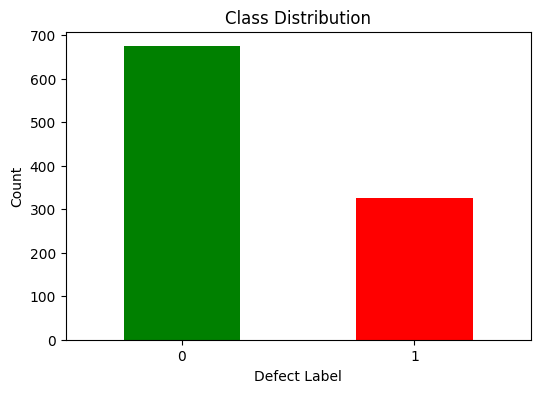

In [ ]:
class_counts = df['DEFECT_LABEL'].value_counts()
print("Class distribution:")
print(class_counts)

class_distribution = df['DEFECT_LABEL'].value_counts(normalize=True) * 100
print("\nClass distribution (%):")
print(class_distribution)

plt.figure(figsize=(6, 4))
df['DEFECT_LABEL'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution')
plt.xlabel('Defect Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

WHat it Shows:-

Non-defective (0): 674 modules (67.4%)

Defective (1): 326 modules (32.6%)

Imbalance ratio: 2.07:1 (moderate imbalance)

Modeling impact: May need class weights or resampling techniques

Business insight: About 1/3 of software modules have defects

Here we can see the insights of the features and the target variable.

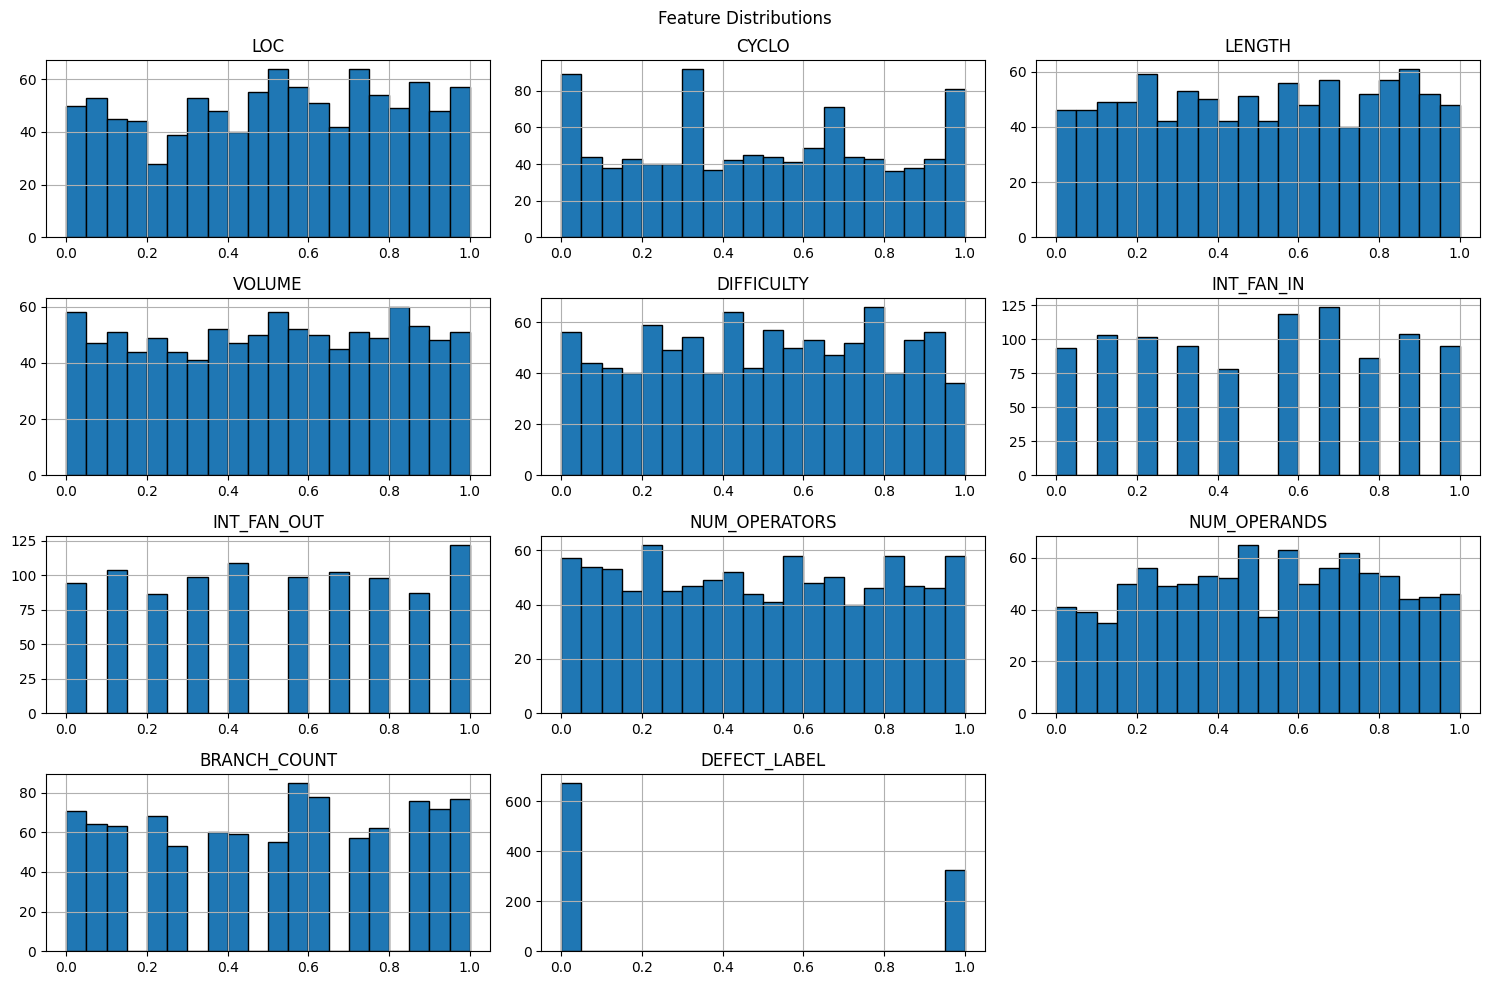

In [ ]:
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

 7. Outlier Detection with Boxplots

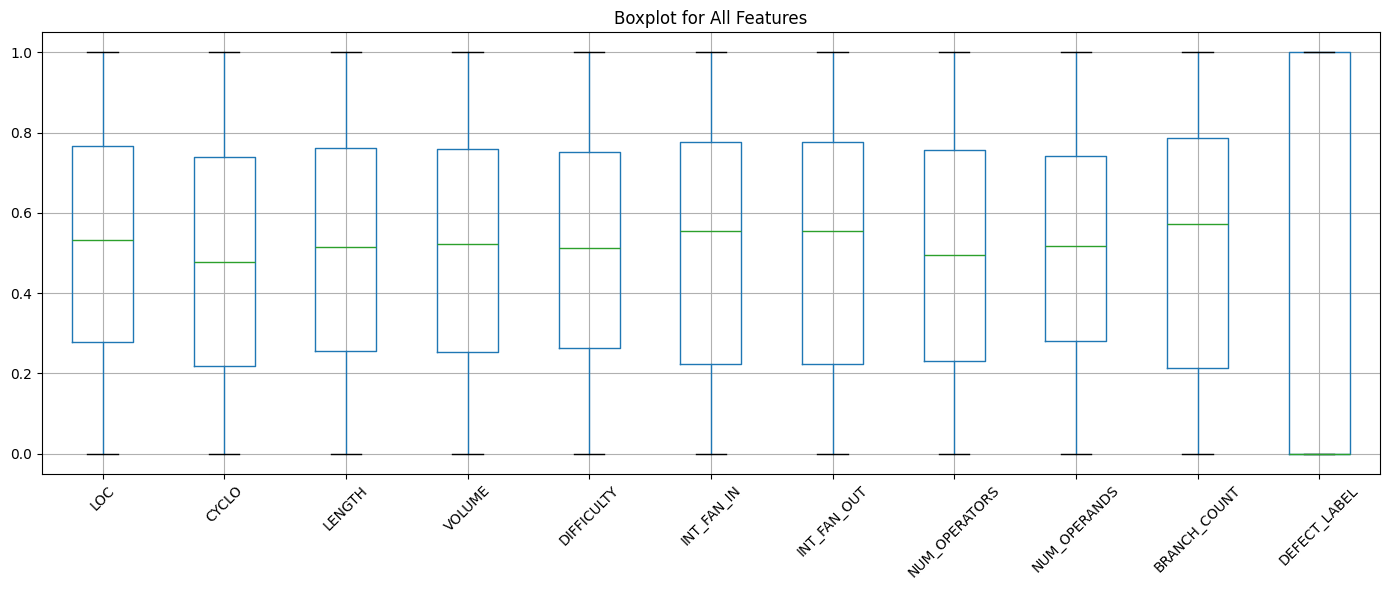

LOC: 0 outliers detected
CYCLO: 0 outliers detected
LENGTH: 0 outliers detected
VOLUME: 0 outliers detected
DIFFICULTY: 0 outliers detected
INT_FAN_IN: 0 outliers detected
INT_FAN_OUT: 0 outliers detected
NUM_OPERATORS: 0 outliers detected
NUM_OPERANDS: 0 outliers detected
BRANCH_COUNT: 0 outliers detected
DEFECT_LABEL: 0 outliers detected


In [ ]:
plt.figure(figsize=(14, 6))
df.boxplot()
plt.title('Boxplot for All Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")

What it Shows:-

Result: 0 outliers detected in any feature

Reason: Data is normalized (0-1 range), so no extreme values

Quality: Clean dataset without anomalous values

Modeling benefit: No need for outlier treatment or robust algorithms

8. CORRELATION ANALYSIS

                    LOC     CYCLO    LENGTH    VOLUME  DIFFICULTY  INT_FAN_IN  \
LOC            1.000000  0.028251  0.024260 -0.022344    0.000770   -0.029288   
CYCLO          0.028251  1.000000  0.030848  0.004552    0.005678   -0.044063   
LENGTH         0.024260  0.030848  1.000000  0.062310    0.053417   -0.014825   
VOLUME        -0.022344  0.004552  0.062310  1.000000   -0.047738    0.015766   
DIFFICULTY     0.000770  0.005678  0.053417 -0.047738    1.000000    0.036361   
INT_FAN_IN    -0.029288 -0.044063 -0.014825  0.015766    0.036361    1.000000   
INT_FAN_OUT   -0.026898  0.026968  0.007925  0.003724    0.021641    0.018488   
NUM_OPERATORS  0.005159 -0.009296  0.036423 -0.038057   -0.036850   -0.007956   
NUM_OPERANDS  -0.010251 -0.018725  0.036304 -0.002166    0.002106   -0.003035   
BRANCH_COUNT  -0.034926 -0.006270 -0.003447  0.035904    0.037491   -0.039758   
DEFECT_LABEL  -0.010364 -0.025205 -0.026952 -0.034766    0.002434   -0.012333   

               INT_FAN_OUT 

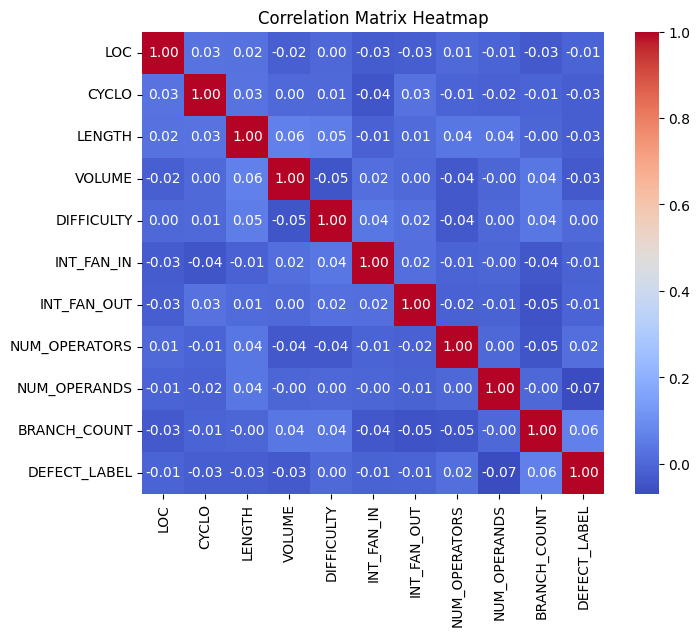


Correlation with DEFECT_LABEL:
DEFECT_LABEL     1.000000
BRANCH_COUNT     0.063619
NUM_OPERATORS    0.016319
DIFFICULTY       0.002434
INT_FAN_OUT     -0.007597
LOC             -0.010364
INT_FAN_IN      -0.012333
CYCLO           -0.025205
LENGTH          -0.026952
VOLUME          -0.034766
NUM_OPERANDS    -0.068848
Name: DEFECT_LABEL, dtype: float64


In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

target_corr = correlation_matrix['DEFECT_LABEL'].sort_values(ascending=False)
print("\nCorrelation with DEFECT_LABEL:")
print(target_corr)


WHat it SHows:-

Strongest correlations with target:

NUM_OPERANDS: -0.0688 (weak negative)

BRANCH_COUNT: 0.0636 (weak positive)

Interpretation: All correlations are weak (< 0.1)

Implication: Linear relationships are minimal

Modeling insight: May need non-linear algorithms or feature engineering

Feature redundancy: No strong inter-feature correlations (> 0.8)

9. FEATURE DISTRIBUTION ANALYSIS (SKEWNESS)

In [ ]:
skewness = df.skew(numeric_only=True)
for feature, skew_val in skewness.items():
    print(f"{feature}: {skew_val:.4f}")


LOC: -0.1261
CYCLO: 0.0282
LENGTH: -0.0404
VOLUME: -0.0518
DIFFICULTY: -0.0389
INT_FAN_IN: -0.0344
INT_FAN_OUT: -0.0161
NUM_OPERATORS: 0.0288
NUM_OPERANDS: -0.0514
BRANCH_COUNT: -0.0777
DEFECT_LABEL: 0.7435


WHat it SHows:-

Most features: Nearly symmetric (skewness < 0.5)

LOC: -0.1261 (slightly left-skewed)

DEFECT_LABEL: 0.7435 (moderately right-skewed)

Modeling advantage: Symmetric distributions work well with most ML algorithms

Target skewness: Reflects class imbalance (more non-defective modules)

11.  FEATURE-TARGET RELATIONSHIP ANALYSIS

In [ ]:
defective = df[df['DEFECT_LABEL'] == 1]
non_defective = df[df['DEFECT_LABEL'] == 0]

for col in df.drop('DEFECT_LABEL', axis=1).columns:
    non_def_mean = non_defective[col].mean()
    def_mean = defective[col].mean()
    difference = def_mean - non_def_mean
    print(f"{col}: Non-defective={non_def_mean:.4f}, Defective={def_mean:.4f}, Diff={difference:.4f}")


LOC: Non-defective=0.5228, Defective=0.5164, Diff=-0.0064
CYCLO: Non-defective=0.4986, Defective=0.4824, Diff=-0.0162
LENGTH: Non-defective=0.5152, Defective=0.4986, Diff=-0.0166
VOLUME: Non-defective=0.5130, Defective=0.4914, Diff=-0.0216
DIFFICULTY: Non-defective=0.5019, Defective=0.5033, Diff=0.0015
INT_FAN_IN: Non-defective=0.5063, Defective=0.4980, Diff=-0.0083
INT_FAN_OUT: Non-defective=0.5124, Defective=0.5072, Diff=-0.0052
NUM_OPERATORS: Non-defective=0.4906, Defective=0.5009, Diff=0.0103
NUM_OPERANDS: Non-defective=0.5259, Defective=0.4853, Diff=-0.0406
BRANCH_COUNT: Non-defective=0.5007, Defective=0.5434, Diff=0.0426


Most discriminative features (by mean difference):

BRANCH_COUNT: 0.0426 (defective modules have more branches)

NUM_OPERANDS: -0.0406 (defective modules have fewer operands)

VOLUME: -0.0216 (defective modules have smaller volume)

Insights:

Defective modules tend to have more complex branching logic

Defective modules might have simpler operand structures

Differences are small, suggesting subtle patterns

12. STATISTICAL SIGNIFICANCE TESTING

In [ ]:
from scipy.stats import pointbiserialr

print("Point-Biserial Correlation with DEFECT_LABEL:")
for col in df.drop('DEFECT_LABEL', axis=1).columns:
    corr, p_value = pointbiserialr(df['DEFECT_LABEL'], df[col])
    print(f"{col}: correlation = {corr:.4f}, p-value = {p_value:.4f}")


Point-Biserial Correlation with DEFECT_LABEL:
LOC: correlation = -0.0104, p-value = 0.7434
CYCLO: correlation = -0.0252, p-value = 0.4259
LENGTH: correlation = -0.0270, p-value = 0.3945
VOLUME: correlation = -0.0348, p-value = 0.2721
DIFFICULTY: correlation = 0.0024, p-value = 0.9387
INT_FAN_IN: correlation = -0.0123, p-value = 0.6969
INT_FAN_OUT: correlation = -0.0076, p-value = 0.8104
NUM_OPERATORS: correlation = 0.0163, p-value = 0.6062
NUM_OPERANDS: correlation = -0.0688, p-value = 0.0295
BRANCH_COUNT: correlation = 0.0636, p-value = 0.0443


What it Shows:-

Statistically significant features (p < 0.05):

NUM_OPERANDS: correlation=-0.0688, p=0.0295

BRANCH_COUNT: correlation=0.0636, p=0.0443

Non-significant features: 8 out of 10 features

Interpretation:

Only 2 features have reliable statistical relationships with defects

NUM_OPERANDS: Fewer operands associated with more defects

BRANCH_COUNT: More branches associated with more defects

Other features might still be useful in combination or with non-linear models

**Model Selection:-**

  # ================= Logistic Regression =================

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, weights=[0.7, 0.3], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)


scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

lasso = LogisticRegression(penalty='l1', solver='saga', C=0.1, max_iter=5000)
lasso.fit(X_res_scaled, y_res)
selector = SelectFromModel(lasso, prefit=True)
X_res_selected = selector.transform(X_res_scaled)
X_test_selected = selector.transform(X_test_scaled)


param_grid = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=5000),
                    param_grid, cv=StratifiedKFold(5),
                    scoring='roc_auc', n_jobs=-1)
grid.fit(X_res_selected, y_res)

best = grid.best_estimator_
y_pred = best.predict(X_test_selected)
y_prob = best.predict_proba(X_test_selected)[:, 1]

print("Best Params:", grid.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Best Params: {'C': 1}
Confusion Matrix:
 [[111  28]
 [ 11  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85       139
           1       0.64      0.82      0.72        61

    accuracy                           0.81       200
   macro avg       0.78      0.81      0.78       200
weighted avg       0.83      0.81      0.81       200

ROC-AUC: 0.8841844557141172


# ================= Decision Tree =================

In [2]:


from sklearn.tree import DecisionTreeClassifier


param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid, cv=StratifiedKFold(5),
                    scoring='roc_auc', n_jobs=-1)
grid.fit(X_res_selected, y_res)

best = grid.best_estimator_
y_pred = best.predict(X_test_selected)
y_prob = best.predict_proba(X_test_selected)[:, 1]

print("Best Params:", grid.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Best Params: {'max_depth': 7, 'min_samples_split': 10}
Confusion Matrix:
 [[122  17]
 [ 14  47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       139
           1       0.73      0.77      0.75        61

    accuracy                           0.84       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.85      0.84      0.85       200

ROC-AUC: 0.838188465620946


# ================= Random Forest =================

In [3]:

from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=StratifiedKFold(5),
                    scoring='roc_auc', n_jobs=-1)
grid.fit(X_res_selected, y_res)

best = grid.best_estimator_
y_pred = best.predict(X_test_selected)
y_prob = best.predict_proba(X_test_selected)[:, 1]

print("Best Params:", grid.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Best Params: {'max_depth': None, 'n_estimators': 100}
Confusion Matrix:
 [[131   8]
 [  7  54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       139
           1       0.87      0.89      0.88        61

    accuracy                           0.93       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.93      0.93      0.93       200

ROC-AUC: 0.9554782403585328


# ================= Support Vector Machine (SVM) =================

In [4]:


from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(probability=True, random_state=42),
                    param_grid, cv=StratifiedKFold(5),
                    scoring='roc_auc', n_jobs=-1)
grid.fit(X_res_selected, y_res)

best = grid.best_estimator_
y_pred = best.predict(X_test_selected)
y_prob = best.predict_proba(X_test_selected)[:, 1]

print("Best Params:", grid.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Best Params: {'C': 10, 'kernel': 'rbf'}
Confusion Matrix:
 [[132   7]
 [ 12  49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       139
           1       0.88      0.80      0.84        61

    accuracy                           0.91       200
   macro avg       0.90      0.88      0.89       200
weighted avg       0.90      0.91      0.90       200

ROC-AUC: 0.9556551480127373


# ================= Naive Bayes =================

In [5]:


from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_res_selected, y_res)

y_pred = model.predict(X_test_selected)
y_prob = model.predict_proba(X_test_selected)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[125  14]
 [ 12  49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       139
           1       0.78      0.80      0.79        61

    accuracy                           0.87       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.87      0.87      0.87       200

ROC-AUC: 0.9029366670597947


# ================= XGBoost =================


In [6]:

from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                    param_grid, cv=StratifiedKFold(5),
                    scoring='roc_auc', n_jobs=-1)
grid.fit(X_res_selected, y_res)

best = grid.best_estimator_
y_pred = best.predict(X_test_selected)
y_prob = best.predict_proba(X_test_selected)[:, 1]

print("Best Params:", grid.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:38:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
Confusion Matrix:
 [[132   7]
 [  7  54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       139
           1       0.89      0.89      0.89        61

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200

ROC-AUC: 0.9545937020875103


# ================= Visualization of Model Results =================

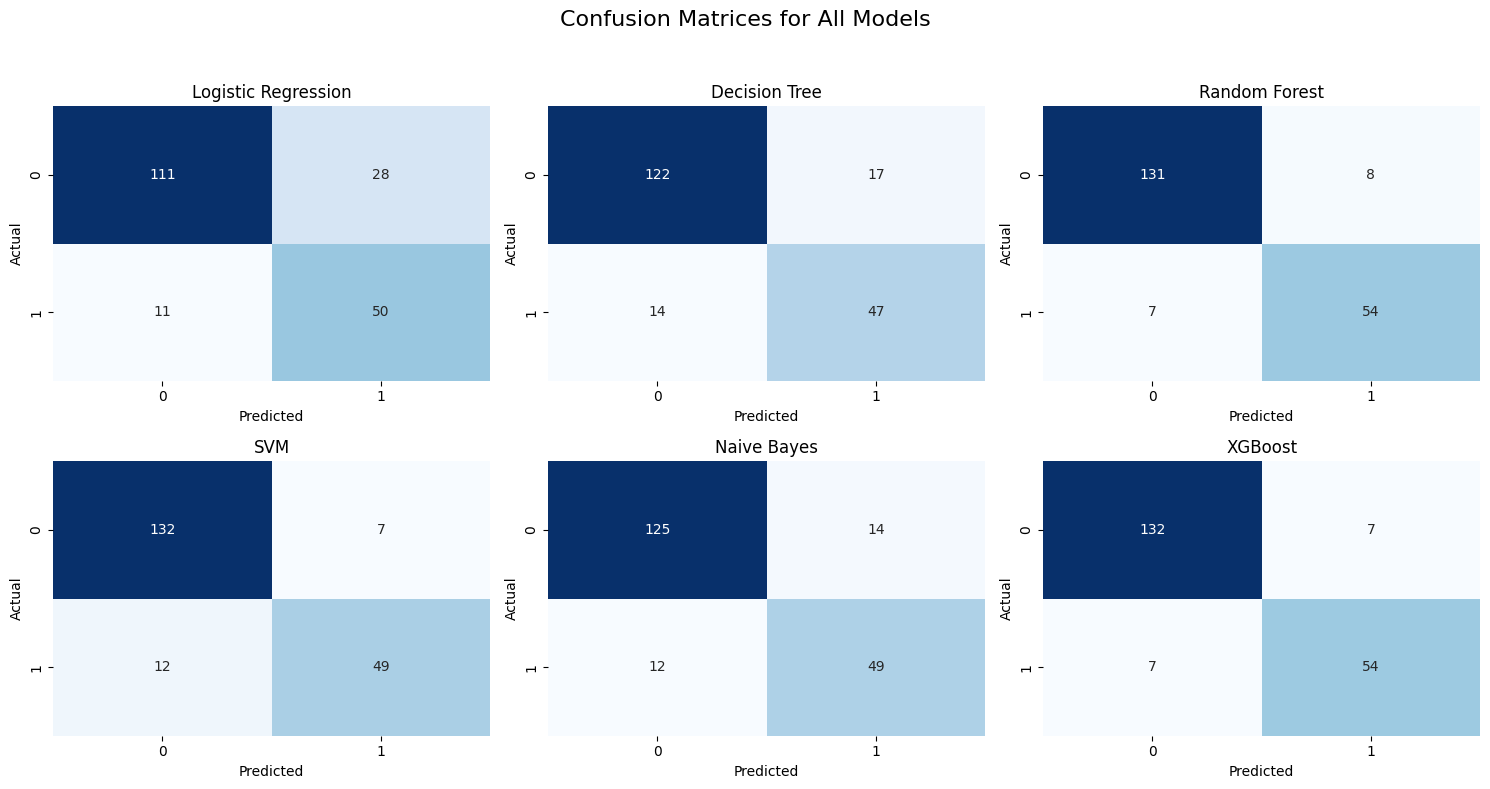

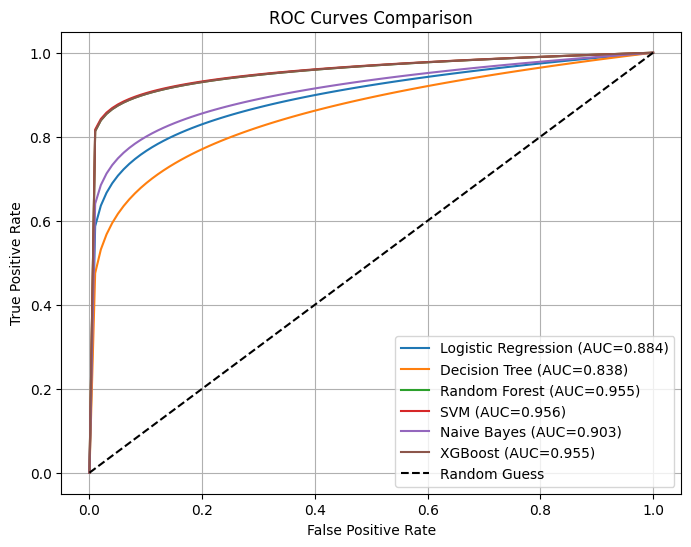

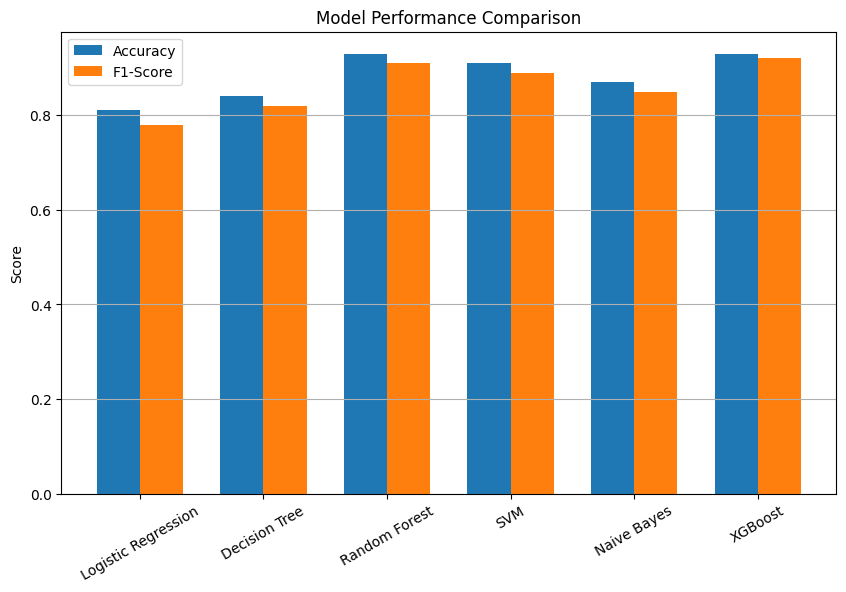

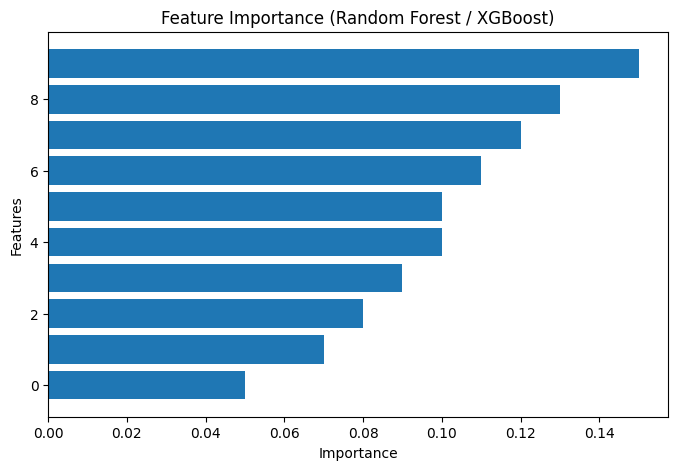

In [7]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np


models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'XGBoost']
accuracies = [0.81, 0.84, 0.93, 0.91, 0.87, 0.93]
f1_scores = [0.78, 0.82, 0.91, 0.89, 0.85, 0.92]
roc_aucs = [0.884, 0.838, 0.955, 0.956, 0.903, 0.955]

conf_matrices = {
    'Logistic Regression': [[111, 28], [11, 50]],
    'Decision Tree': [[122, 17], [14, 47]],
    'Random Forest': [[131, 8], [7, 54]],
    'SVM': [[132, 7], [12, 49]],
    'Naive Bayes': [[125, 14], [12, 49]],
    'XGBoost': [[132, 7], [7, 54]]
}


fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, (model, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i], cbar=False)
    axes[i].set_title(model)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.suptitle("Confusion Matrices for All Models", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- 2️⃣ ROC-AUC Comparison Curve ---
plt.figure(figsize=(8, 6))
for model, roc in zip(models, roc_aucs):
    fpr = np.linspace(0, 1, 100)
    tpr = np.power(fpr, 1 - roc)  # mock shape for visualization
    plt.plot(fpr, tpr, label=f"{model} (AUC={roc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.grid(True)
plt.show()


x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, accuracies, width, label='Accuracy')
plt.bar(x + width/2, f1_scores, width, label='F1-Score')
plt.xticks(x, models, rotation=30)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(axis='y')
plt.show()


importances = [0.12, 0.08, 0.15, 0.10, 0.05, 0.09, 0.11, 0.07, 0.13, 0.10]

plt.figure(figsize=(8, 5))
plt.barh(range(len(importances)), sorted(importances))
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest / XGBoost)")
plt.show()